In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#To see the datasets in sns 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [31]:
#Load the flights dataset from seaborn
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [6]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [35]:
#Since we only need one time(a complete date) column, we need to merge the year and month columns and take one common date 
#We choose the first day of the month(date 1) and concancate the day-month and year
df['Date'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.head()

,year,month,passengers,Date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [36]:
#We will then convert the date column to index 
#Converting a datetime column to an index is common in time series analysis because it simplifies certain operations 
#and allows you to leverage time-based indexing.
df.set_index('Date', inplace = True)
df.head()

,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='Date', ylabel='passengers'>

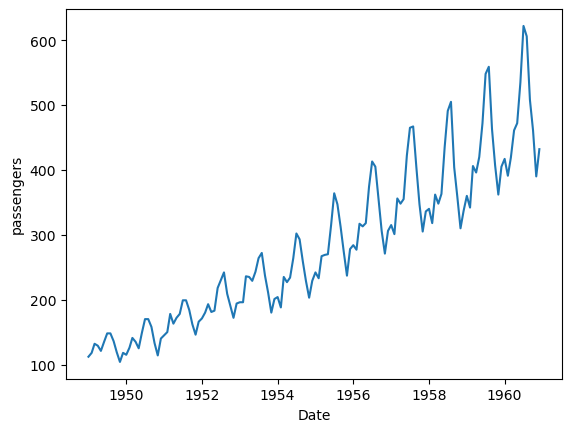

In [37]:
#Plotting the data in a line plot 
sns.lineplot(data= df, x = df.index, y= df.passengers)

From the above we can see the trend and seasonal components of the time series. 
*Seasonality 
*Trend
We cannot fit any models to this data since it will introduce bias and the model maybe inaccurate. 
We first check the suitability of the data.(Stationarity) 
Stationarity means that the mean and the variance is constant/ does not vary. 
Variance is the distance from the mean(the variation from the mean) 
In otrder to fit a time series model you should remove the properties and make the data statinary 

## How to check for stationarity 
1. ADF/ ADCF - Augmented Dickey-Fuller (ADF) Test: This test checks for the presence of a unit root, which indicates non-stationarity. The null hypothesis of the test is that the time series has a unit root (i.e., it is non-stationary).
2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test: This test has a null hypothesis that the time series is stationary. If the test statistic is greater than the critical value, the null hypothesis can be rejected.
3. Rolling statistics - Take rolling mean or rolling variance and plot it 

In [38]:
df['rolling_mean'] = df.passengers.rolling(window =12).mean()
df['rolling_std'] = df.passengers.rolling(window =12).std()
# window size in rolling statistics refers to the number of consecutive data points in a time series 
# used to compute a statistic

<Axes: xlabel='Date', ylabel='passengers'>

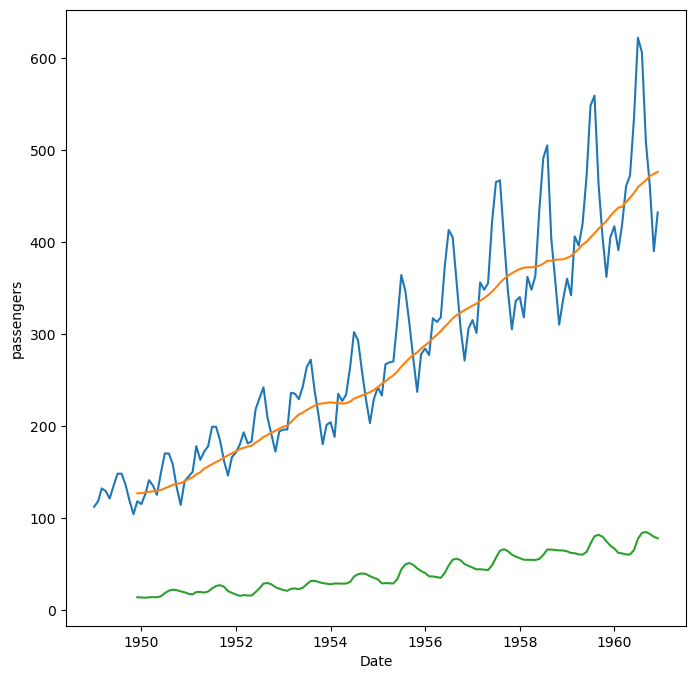

In [39]:
#Plotting the rolling values
plt.figure(figsize = (8,8))
sns.lineplot(data=df, x=df.index, y = df.passengers)
sns.lineplot(data=df, x=df.index, y = df.rolling_mean)
sns.lineplot(data=df, x=df.index, y = df.rolling_std)

The variance is approximately constant/ stationary, however the mean is not stationary(it shows a pattern). 

In [40]:
#We do the ADF-fuller test 
#Test statistic should be lesser than critical values 
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['passengers'],autolag='AIC',)

In [41]:
adfTest

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [42]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [43]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In our case, the test statistic is greater than the critical values hence we fail to reject the null hypothesis (the null hypothesis of the test is that the time series has a unit root (i.e., it is non-stationary)) 
Hence our data is non-stationary. 

## How to make the data stationary 
1. Time shift 
2. Log 
3. Square root 
4. Cube 

In [44]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')


In [45]:
df.head()

,year,month,passengers,rolling_mean,rolling_std
Date,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [47]:
air_df = df[['passengers']]
air_df.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [49]:
#Time shift 
air_df["shift"] = air_df.passengers.shift()
air_df["Shift_diff"] = air_df['passengers'] - air_df["shift"]
air_df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\3373810459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["shift"] = air_df.passengers.shift()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\3373810459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["Shift_diff"] = air_df['passengers'] - air_df["shift"]


,passengers,shift,Shift_diff
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.657779
p-value                          0.081634
#lags used                      12.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


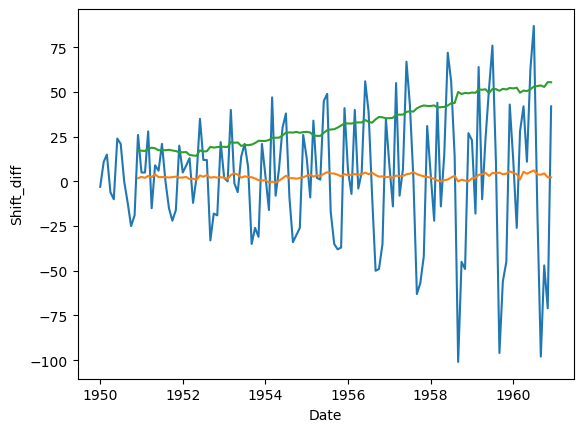

In [53]:
test_stationarity(air_df.dropna(), 'Shift_diff')

In [54]:
#Log transfrormation 
air_df["log_trans"] = np.log(air_df['passengers'])
air_df

,passengers,shift,Shift_diff,rollMean,rollStd,log_trans
Date,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499
1949-02-01,118,112.0,6.0,NaN,NaN,4.770685
1949-03-01,132,118.0,14.0,NaN,NaN,4.882802
1949-04-01,129,132.0,-3.0,NaN,NaN,4.859812
1949-05-01,121,129.0,-8.0,NaN,NaN,4.795791
...,...,...,...,...,...,...
1960-08-01,606,622.0,-16.0,3.916667,53.364030,6.406880
1960-09-01,508,606.0,-98.0,3.750000,53.706483,6.230481
1960-10-01,461,508.0,-47.0,4.500000,52.852281,6.133398


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


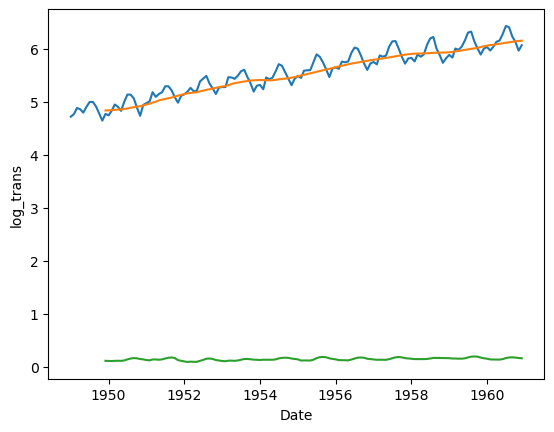

In [55]:
test_stationarity(air_df, 'log_trans')

In [56]:
#Squareroot 
air_df["sqrt"] = np.sqrt(air_df['passengers'])
air_df.head()

,passengers,shift,Shift_diff,rollMean,rollStd,log_trans,sqrt
Date,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,10.583005
1949-02-01,118,112.0,6.0,NaN,NaN,4.770685,10.862780
1949-03-01,132,118.0,14.0,NaN,NaN,4.882802,11.489125
1949-04-01,129,132.0,-3.0,NaN,NaN,4.859812,11.357817
1949-05-01,121,129.0,-8.0,NaN,NaN,4.795791,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


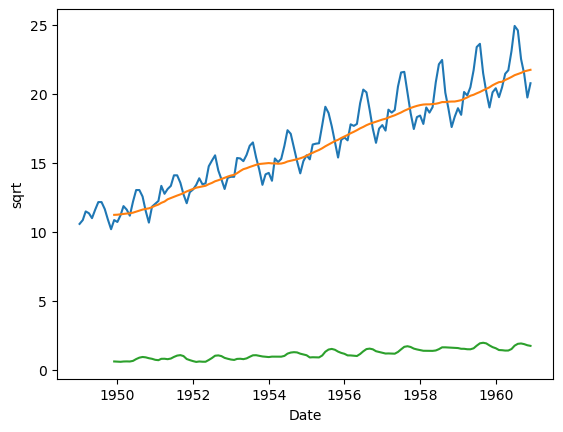

In [57]:
test_stationarity(air_df, 'sqrt')

In [58]:
air_df["cbrt"] = np.cbrt(air_df['passengers'])
air_df.head()

,passengers,shift,Shift_diff,rollMean,rollStd,log_trans,sqrt,cbrt
Date,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,10.583005,4.820285
1949-02-01,118,112.0,6.0,NaN,NaN,4.770685,10.862780,4.904868
1949-03-01,132,118.0,14.0,NaN,NaN,4.882802,11.489125,5.091643
1949-04-01,129,132.0,-3.0,NaN,NaN,4.859812,11.357817,5.052774
1949-05-01,121,129.0,-8.0,NaN,NaN,4.795791,11.000000,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


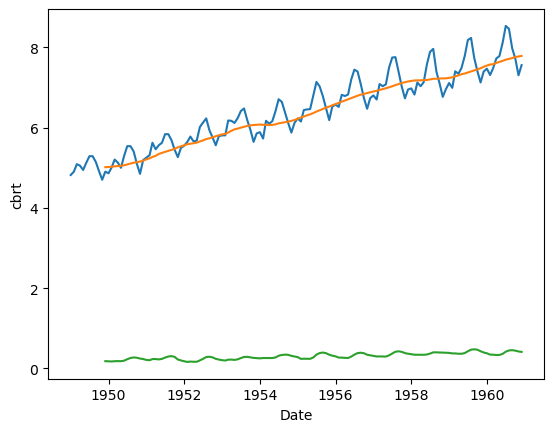

In [59]:
test_stationarity(air_df, 'cbrt')

In [61]:
#log and sqrt
air_df["log_sqrt"] = np.sqrt(air_df['log_trans'])
air_df.head()

,passengers,shift,Shift_diff,rollMean,rollStd,log_trans,sqrt,cbrt,log_sqrt
Date,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,10.583005,4.820285,2.172211
1949-02-01,118,112.0,6.0,NaN,NaN,4.770685,10.862780,4.904868,2.184190
1949-03-01,132,118.0,14.0,NaN,NaN,4.882802,11.489125,5.091643,2.209706
1949-04-01,129,132.0,-3.0,NaN,NaN,4.859812,11.357817,5.052774,2.204498
1949-05-01,121,129.0,-8.0,NaN,NaN,4.795791,11.000000,4.946087,2.189929


Test Statistic                  -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


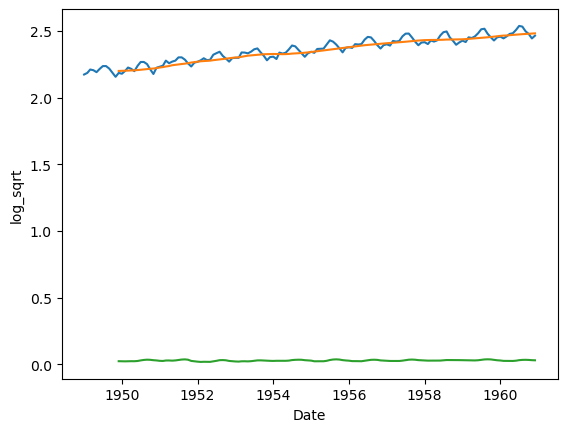

In [62]:
test_stationarity(air_df, 'log_sqrt')

In [63]:
#log and cube root 
air_df["log_cbrt"] = np.cbrt(air_df['log_trans'])
air_df.head()

,passengers,shift,Shift_diff,rollMean,rollStd,log_trans,sqrt,cbrt,log_sqrt,log_cbrt
Date,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,10.583005,4.820285,2.172211,1.677263
1949-02-01,118,112.0,6.0,NaN,NaN,4.770685,10.862780,4.904868,2.184190,1.683424
1949-03-01,132,118.0,14.0,NaN,NaN,4.882802,11.489125,5.091643,2.209706,1.696510
1949-04-01,129,132.0,-3.0,NaN,NaN,4.859812,11.357817,5.052774,2.204498,1.693843
1949-05-01,121,129.0,-8.0,NaN,NaN,4.795791,11.000000,4.946087,2.189929,1.686372


Test Statistic                  -2.015066
p-value                          0.280006
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


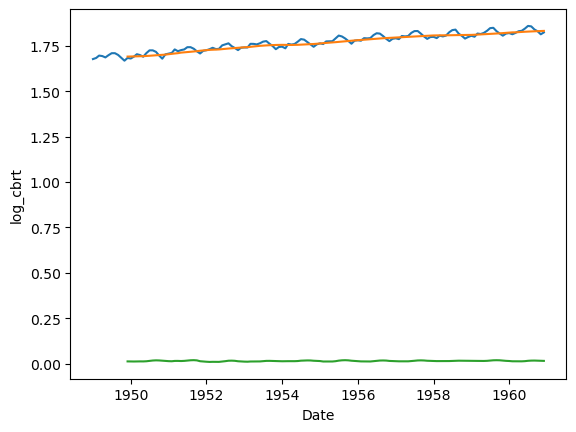

In [64]:
test_stationarity(air_df, 'log_cbrt')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -3.079116
p-value                          0.028138
#lags used                      13.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


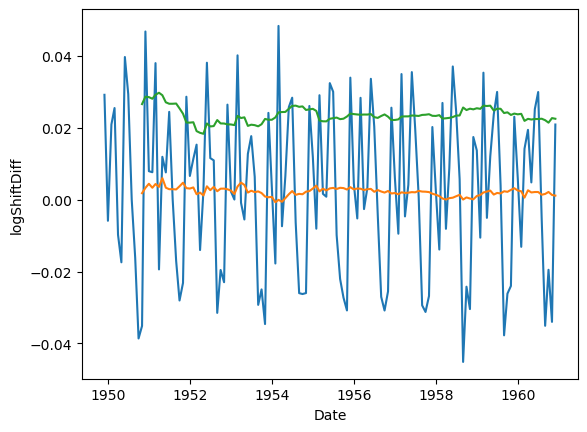

In [66]:
#log,sqrt,shift 

air_df['logShiftDiff'] = air_df['log_sqrt'] - air_df['log_sqrt'].shift()
air_df.head()


test_stationarity(air_df.dropna(),'logShiftDiff')


## Model building 

In [67]:
df.head()

,year,month,passengers,rolling_mean,rolling_std
Date,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [68]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,firstDiff,Diff12
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [83]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


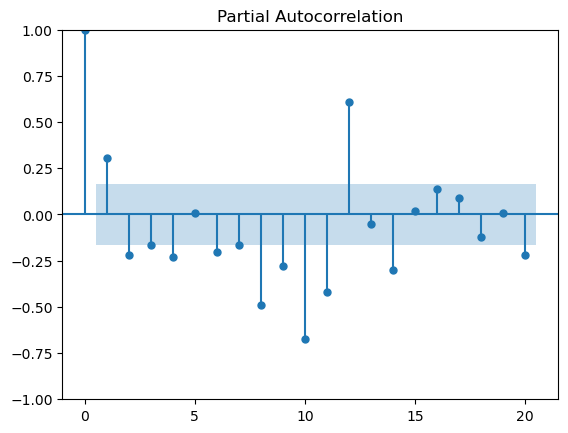

In [70]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

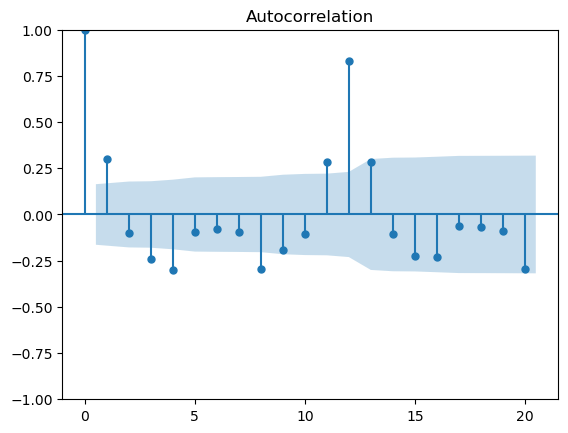

In [71]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [74]:
# p = 1, q = 3, d =1
#Splitting data to train and test 

train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
train.head()

,passengers,firstDiff,Diff12
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [78]:
test.head()

,passengers,firstDiff,Diff12
Date,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [76]:
len(train)

101

In [77]:
len(test)

43

In [84]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
Date,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='Date', ylabel='passengers'>

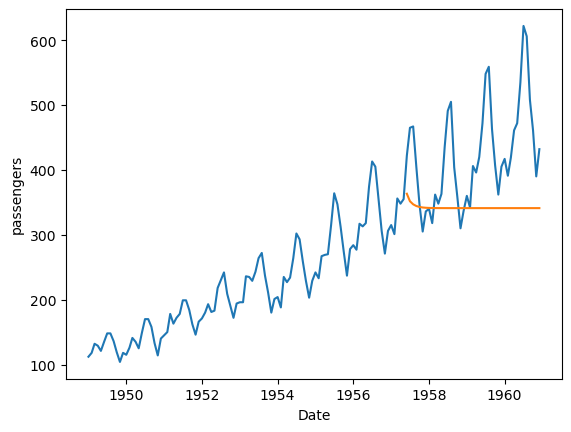

In [85]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [86]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(test['passengers'],prediction))

111.11010338544992

Seasonal ARIMA model 
This model is an extension of the ARIMA model that explicitly models seasonality in time series data. It’s particularly useful when the data has both trend and seasonal components. 

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


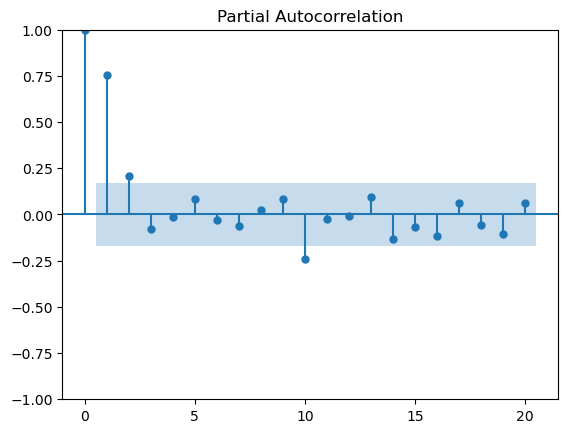

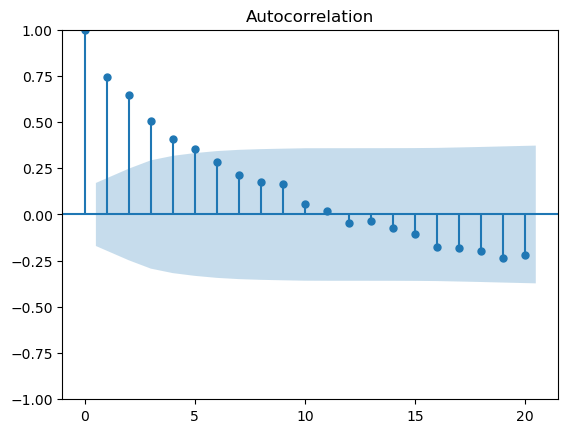

In [88]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);


In [89]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likel

In [92]:
airP.dropna()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
Date,,,,,
1957-06-01,422,67.0,48.0,363.295709,405.846791
1957-07-01,465,43.0,52.0,351.699792,450.022938
1957-08-01,467,2.0,62.0,346.961970,441.793987
1957-09-01,404,-63.0,49.0,344.344094,390.869305
1957-10-01,347,-57.0,41.0,342.897590,345.533198
1957-11-01,305,-42.0,34.0,342.098327,307.560506
1957-12-01,336,31.0,30.0,341.656695,344.634125
1958-01-01,340,4.0,25.0,341.412672,354.968998
1958-02-01,318,-22.0,17.0,341.277838,338.412426


In [93]:
airP.head()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
Date,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,NaN,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN,NaN


<Axes: xlabel='Date', ylabel='passengers'>

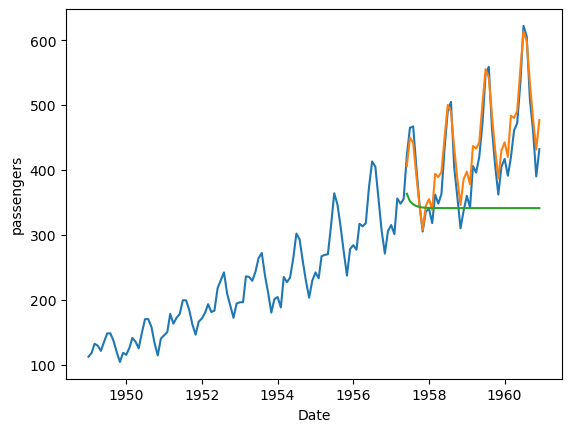

In [94]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [95]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.50241712569641

In [96]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [97]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

1961-01-01    490.670356
1961-02-01    465.161148
1961-03-01    532.967254
1961-04-01    530.211030
1961-05-01    542.085443
1961-06-01    612.662227
1961-07-01    674.640338
1961-08-01    657.216418
1961-09-01    588.193804
1961-10-01    528.951272
1961-11-01    478.640829
1961-12-01    526.707839
1962-01-01    541.608259
1962-02-01    513.237176
1962-03-01    585.355227
1962-04-01    583.030069
1962-05-01    596.054208
1962-06-01    671.997132
1962-07-01    738.086495
1962-08-01    718.534558
1962-09-01    645.021158
1962-10-01    581.846257
1962-11-01    528.685887
1962-12-01    579.355903
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date', ylabel='passengers'>

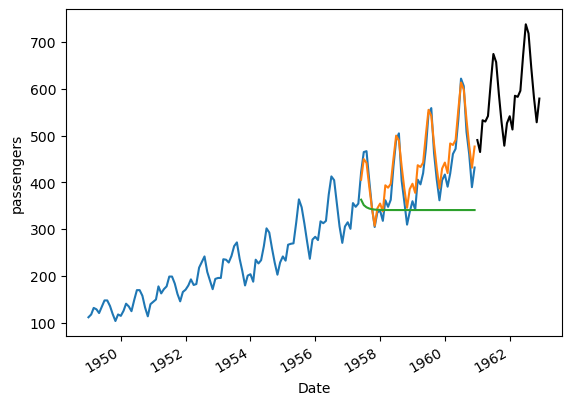

In [98]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [99]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()
# checkDf['diffInv'] = checkDf['diff1'].diffinv()
checkDf.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24752\1874553290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkDf['diff1'] = checkDf.diff()


,passengers,diff1
Date,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
